In [1]:
%matplotlib inline
import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
train = np.loadtxt('train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('test.csv', delimiter=',', skiprows=1)

In [3]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

## Визуализируем исходные данные

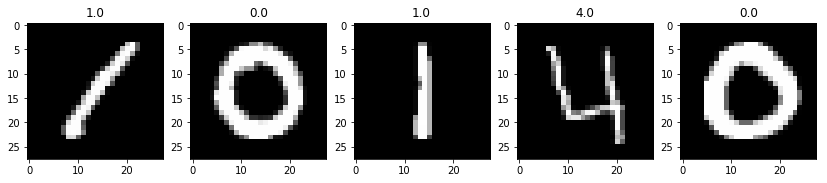

In [4]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

## Вычисляем X и Y составляющие градиента с помощью оператора Собеля

In [5]:
train_sobel_x = np.zeros_like(train_img)
train_sobel_y = np.zeros_like(train_img)
for i in range(len(train_img)):
    train_sobel_x[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    train_sobel_y[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

test_sobel_x = np.zeros_like(test_img)
test_sobel_y = np.zeros_like(test_img)
for i in range(len(test_img)):
    test_sobel_x[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    test_sobel_y[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

## Вычисляем угол и длину вектора градиента

In [6]:
train_g, train_theta = cv2.cartToPolar(train_sobel_x, train_sobel_y)
test_g, test_theta = cv2.cartToPolar(test_sobel_x, test_sobel_y)

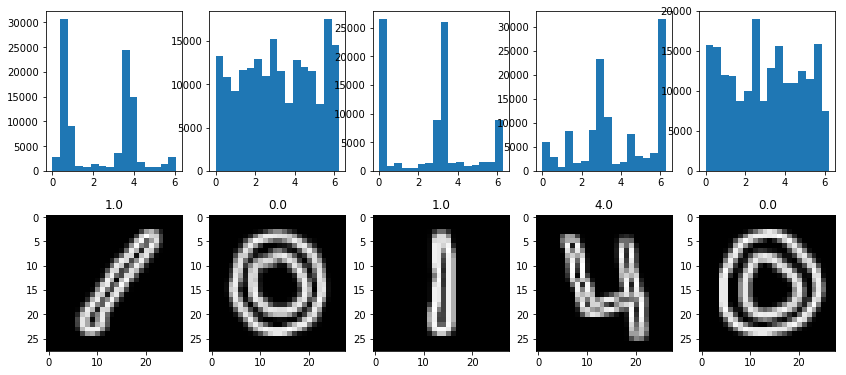

In [7]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_g[:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);
    subplot = fig.add_subplot(3, 7, i)
    plt.hist(train_theta[i - 1].flatten(),
             bins=16, weights=train_g[i - 1].flatten())

## Вычисляем гистограммы градиентов

In [215]:
train_img.shape

(42000, 28, 28)

In [216]:
train_theta.shape

(42000, 28, 28)

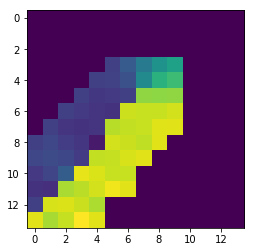

In [231]:
plt.imshow(train_theta[0,:14,14:
                      ])

In [304]:
list(range(6,30,6))


[6, 12, 18, 24]

In [ ]:
testets=

In [305]:
# Гистограммы вычисляются с учетом длины вектора градиента
train_hist = np.zeros((len(train_img),8*16))
#делим изображение на 8 частей, в дальнейшем гистограммы градиентов будем использовать как фичи
#1,2
#3,4
#5,6
#7,8

for i in range(len(train_img)):
    hist_1, borders_1 = np.histogram(train_theta[i,:8,:15],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i,:8,:15])
    
    hist_2, borders_2 = np.histogram(train_theta[i,:8,15:],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i,:8,15:])
    
    hist_3, borders_3 = np.histogram(train_theta[i,8:15,:15],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i,8:15,:15])
    
    hist_4, borders_4 = np.histogram(train_theta[i,8:15,15:],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i,8:15,15:])
    
    hist_5, borders_5 = np.histogram(train_theta[i,15:22,:15],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i,15:22,:15])
    
    hist_6, borders_6 = np.histogram(train_theta[i,15:22,15:],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i,15:22,15:])
    
    hist_7, borders_7 = np.histogram(train_theta[i,22:,:15],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i,22:,:15])
    
    hist_8, borders_8 = np.histogram(train_theta[i,22:,15:],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i,22:,15:])
    
    train_hist[i] = np.concatenate([hist_1,hist_2,hist_3,hist_4,hist_5,hist_6,hist_7,hist_8])
#     train_hist[i] = np.roll(hist, -hist.argmax())

    
 

In [289]:
train_hist.shape

(45136,)

In [241]:
test_hist = np.zeros((len(test_img), 16*8))
#1,2
#3,4
#5,6tt
#7,8
for i in range(len(test_img)):
    hist_1, borders_1 = np.histogram(test_theta[i,:8,:15],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i,:8,:15])
    
    hist_2, borders_2 = np.histogram(test_theta[i,:8,15:],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i,:8,15:])
    
    hist_3, borders_3 = np.histogram(test_theta[i,8:15,:15],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i,8:15,:15])
    
    hist_4, borders_4 = np.histogram(test_theta[i,8:15,15:],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i,8:15,15:])
    
    hist_5, borders_5 = np.histogram(test_theta[i,15:22,:15],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i,15:22,:15])
    
    hist_6, borders_6 = np.histogram(test_theta[i,15:22,15:],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i,15:22,15:])
    
    hist_7, borders_7 = np.histogram(test_theta[i,22:,:15],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i,22:,:15])
    
    hist_8, borders_8 = np.histogram(test_theta[i,22:,15:],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i,22:,15:])
    
    test_hist[i] = np.concatenate([hist_1,hist_2,hist_3,hist_4,hist_5,hist_6,hist_7,hist_8])

## Нормируем вектор гистограммы

In [306]:
train_hist = train_hist / np.linalg.norm(train_hist, axis=1)[:, None]
test_hist = test_hist / np.linalg.norm(test_hist, axis=1)[:, None]

## Разбиваем выборку на обучение и валидацию

In [307]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_hist, test_size=0.2, random_state=42)

## Собираем полносвязную сеть для обучения

In [308]:
from keras import regularizers

In [309]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(32, input_dim=x_train.shape[1],kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Выводим информацию о модели

In [310]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_91 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_92 (Dense)             (None, 10)                170       
Total params: 4,826
Trainable params: 4,826
Non-trainable params: 0
_________________________________________________________________


## One hot encoding разметки

In [311]:
from keras.utils import np_utils
y_train_labels = np_utils.to_categorical(y_train)

In [312]:
print( y_train.shape, y_train_labels.shape, train_hist.shape)

(33600,) (33600, 10) (42000, 128)


## Запускаем обучение

In [313]:
model.fit(x_train, y_train_labels, batch_size=100, epochs=25)

Epoch 1/25
33600/33600 [==============================] - 3s - loss: 1.7160 - acc: 0.6037     
Epoch 2/25
33600/33600 [==============================] - 1s - loss: 0.6970 - acc: 0.9101     
Epoch 3/25
33600/33600 [==============================] - 1s - loss: 0.5008 - acc: 0.9277     
Epoch 4/25
33600/33600 [==============================] - 1s - loss: 0.4093 - acc: 0.9380     
Epoch 5/25
33600/33600 [==============================] - 1s - loss: 0.3557 - acc: 0.9426     
Epoch 6/25
33600/33600 [==============================] - 1s - loss: 0.3210 - acc: 0.9467     
Epoch 7/25
33600/33600 [==============================] - 1s - loss: 0.2948 - acc: 0.9500     
Epoch 8/25
33600/33600 [==============================] - 1s - loss: 0.2764 - acc: 0.9513     
Epoch 9/25
33600/33600 [==============================] - 1s - loss: 0.2608 - acc: 0.9530     
Epoch 10/25
33600/33600 [==============================] - 1s - loss: 0.2483 - acc: 0.9548     
Epoch 11/25
33600/33600 [========================

## Предсказываем класс объекта

In [314]:
pred_val = model.predict_classes(x_val)

7840/8400 [===========================>..] - ETA: 0s


## Оцениваем качество решение на валидационной выборке

In [315]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, pred_val))

Accuracy: 0.961904761905


In [316]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_val))

             precision    recall  f1-score   support

        0.0       0.97      0.98      0.97       816
        1.0       0.99      0.98      0.99       909
        2.0       0.96      0.95      0.95       846
        3.0       0.96      0.96      0.96       937
        4.0       0.96      0.96      0.96       839
        5.0       0.96      0.97      0.96       702
        6.0       0.97      0.97      0.97       785
        7.0       0.97      0.95      0.96       893
        8.0       0.96      0.96      0.96       835
        9.0       0.92      0.95      0.93       838

avg / total       0.96      0.96      0.96      8400



In [317]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_val))

[[797   0   5   0   2   3   6   0   1   2]
 [  0 895   5   2   2   0   1   0   4   0]
 [  7   2 801  11  12   0   0   2  11   0]
 [  1   0   6 901   1  11   1   2   5   9]
 [  1   3   0   0 806   0   6   2   3  18]
 [  0   0   0   9   0 680   7   0   4   2]
 [  6   3   0   0   6   3 765   0   2   0]
 [  2   2  11   2   3   0   0 845   2  26]
 [  2   1   4   3   4   9   3   3 798   8]
 [  4   1   1   9   6   2   0  19   4 792]]


## Предсказания на тестовыйх данных

In [318]:
pred_test = model.predict_classes(test_hist)

27904/28000 [============================>.] - ETA: 0s

## Визуализируем предсказания

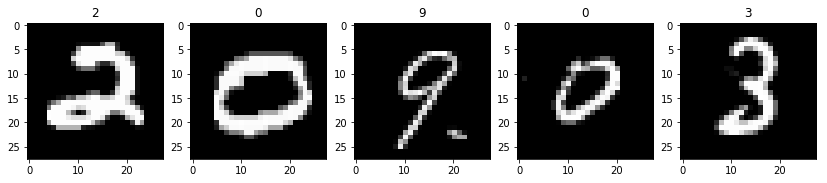

In [319]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

## Готовим файл для отправки

In [321]:
with open('submit_img_parts_2.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, p))

In [23]:
# Your submission scored 0.59843

In [320]:
#1st submission scored 0.96014
#2nd submission scored 0.96442